In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib.image as maping
%matplotlib inline

In [13]:
#数据路径

path='F:/weiwei/xue_qian_yu_jing/xqyj_data'

#学生入学信息

rx_data=pd.read_csv(path+'/2012LQCJ.csv',encoding='gbk')

In [14]:
rx_data.head() 

,id,xh,ksh,xb,mz,zy,zzmm,kslx,dq,zf,tdf,jg,xy,bz
0,1,2012210001,12140829110130,女,汉族,法学,共青团员,城镇往届,山西运城市盐湖区,533,533,山西,法学院,NaN
1,2,2012210002,12152301151762,女,蒙古族,法学,共青团员,城镇应届,内蒙科尔沁区,484,494,内蒙古,法学院,NaN
2,3,2012210003,12220204110242,女,汉族,法学,共青团员,城镇应届,吉林船营区,520,520,吉林,法学院,NaN
3,4,2012210004,12342221112350,女,汉族,法学,共青团员,城镇往届,安徽宿州砀山县,578,578,安徽,法学院,NaN
4,5,2012210005,12361005110362,女,汉族,法学,共青团员,城镇往届,江西大余县,566,566,江西,法学院,NaN


In [15]:
#对性别热编码
xb_dummies=pd.get_dummies(rx_data['xb'])
xb_dummies.columns=['female','male']
rx_data=rx_data.join(xb_dummies)

In [16]:
#对kslx热编码

kslx_dummies=pd.get_dummies(rx_data['kslx'])
kslx_dummies.columns=['ncyj','ncwj','czyj','czwj']
rx_data=rx_data.join(kslx_dummies)

In [17]:
rx_data.head()

,id,xh,ksh,xb,mz,zy,zzmm,kslx,dq,zf,tdf,jg,xy,bz,female,male,ncyj,ncwj,czyj,czwj
0,1,2012210001,12140829110130,女,汉族,法学,共青团员,城镇往届,山西运城市盐湖区,533,533,山西,法学院,NaN,1,0,0,0,0,1
1,2,2012210002,12152301151762,女,蒙古族,法学,共青团员,城镇应届,内蒙科尔沁区,484,494,内蒙古,法学院,NaN,1,0,0,0,1,0
2,3,2012210003,12220204110242,女,汉族,法学,共青团员,城镇应届,吉林船营区,520,520,吉林,法学院,NaN,1,0,0,0,1,0
3,4,2012210004,12342221112350,女,汉族,法学,共青团员,城镇往届,安徽宿州砀山县,578,578,安徽,法学院,NaN,1,0,0,0,0,1
4,5,2012210005,12361005110362,女,汉族,法学,共青团员,城镇往届,江西大余县,566,566,江西,法学院,NaN,1,0,0,0,0,1


In [18]:
rx_data['kslx'].value_counts()

城镇应届    2582
农村应届    2168
农村往届     927
城镇往届     563
Name: kslx, dtype: int64

In [19]:
#考生是否可以加分
rx_data['ks_is_jf']=np.nan
def jf(x,y,z):
    for i in range(len(rx_data)):
        if x.ix[i]==y.ix[i]:
            z.ix[i]=1
        else:
            z.ix[i]=0
    return z
rx_data['ks_is_jf']=jf(rx_data['zf'],rx_data['tdf'],rx_data['ks_is_jf'])

C:\Users\Wvv\Anaconda3\envs\py2\lib\site-packages\pandas\core\indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
rx_data['ks_is_jf']=rx_data['ks_is_jf'].apply(lambda x:int(x))

### 考生号的含义
一般考号规则如下：

1、第1、2位为年度代码：如2015年填写“15”；

2、第3、4位为省市代码：黑龙江省代码为“23”；

3、第5、6、7、8位为县、市、区代码：

4、第9位为考试类别代码：普通高考代码为“1”。

5、第10位为科类代码：文史类—1、外语类—2、艺术类（文）—3、理工类—5、艺术类（理）—7、体育类（理）—8。

6、第11、12、13、14位为考生顺序号。

In [349]:
#保存
rx_data.to_csv('rx_data/rx_feature.csv',index=False)

In [126]:
rx_data=pd.read_csv('rx_data/rx_feature.csv')

代码      名 称        代码      名 称
11       北京市        43       湖南省
12       天津市        44       广东省
13       河北省        45       广西壮族自治区
14       山西省        46       海南省
15       内蒙古自治区   50       重庆市
21       辽宁省        51       四川省
22       吉林省        52       贵州省
23       黑龙江省      53       云南省
31       上海市        54       西藏自治区
32       江苏省        61       陕西省
33       浙江省        62       甘肃省
34       安徽省        63       青海省
35       福建省        64       宁夏回族自治区
36       江西省        65       新疆维吾尔自治区
37       山东省        71       台湾省
41       河南省        81       香港特别行政区
42       湖北省        82       澳门特别行政区

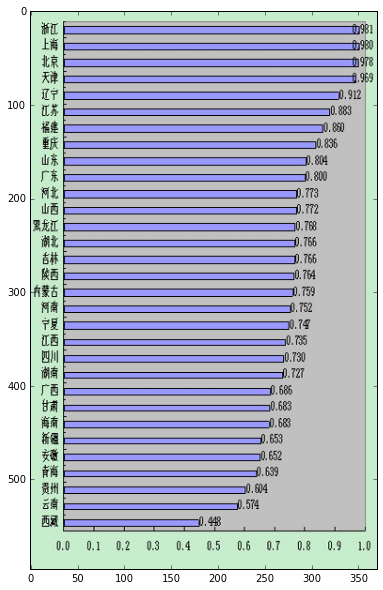

In [127]:
#网上找的中国基础教育省份排名

pm=maping.imread('extra_data/pai_ming.jpg')
plt.figure(figsize=(8,10))
plt.imshow(pm)

In [128]:
a={u'湖北':0.766,u'广西':0.686,u'湖南':0.727,u'贵州':0.604,u'河南':0.752,u'云南':0.574,u'内蒙古':0.759,u'重庆':0.836,u'安徽':0.652,u'山东':0.804,u'福建':0.860,u'江西':0.735,u'江苏':0.883
  ,u'四川':0.730,u'青海':0.639,u'海南':0.683,u'浙江':0.981,u'武汉':0.8,u'辽宁':0.912,u'河北':0.773,u'宁夏':0.747,u'吉林':0.766,u'新疆':0.653,u'陕西':0.764,u'甘肃':0.683,u'山西':0.772,
  u'黑龙江':0.768,u'广东':0.8,u'西藏':0.448,u'内地新疆':0.6,u'内地西藏':0.5,u'上海':0.980,u'北京':0.978,u'天津':0.969}

#各省基础教育得分

rx_data['jydf']=rx_data['jg']
def jydf(x):
    for i in range(len(a)):
        if x==a.keys()[i]:
            return a.values()[i]
rx_data['jydf']=rx_data['jydf'].apply(jydf)

In [129]:
#对考生号进行出理

#提取省市代码
rx_data['csdm']=rx_data['ksh'].apply(lambda x : str(x)[2:6])

#提取考试类别代码
rx_data['kslb']=rx_data['ksh'].apply(lambda x : str(x)[8:9])

#提取科类代码
rx_data['kldm']=rx_data['ksh'].apply(lambda x :str(x)[9:10])

In [130]:
rx_data.head()

,id,xh,ksh,xb,mz,zy,zzmm,kslx,dq,zf,...,male,ncyj,ncwj,czyj,czwj,ks_is_jf,jydf,csdm,kslb,kldm
0,1,2012210001,12140829110130,女,汉族,法学,共青团员,城镇往届,山西运城市盐湖区,533,...,0,0,0,0,1,1,0.772,1408,1,1
1,2,2012210002,12152301151762,女,蒙古族,法学,共青团员,城镇应届,内蒙科尔沁区,484,...,0,0,0,1,0,0,0.759,1523,1,5
2,3,2012210003,12220204110242,女,汉族,法学,共青团员,城镇应届,吉林船营区,520,...,0,0,0,1,0,1,0.766,2202,1,1
3,4,2012210004,12342221112350,女,汉族,法学,共青团员,城镇往届,安徽宿州砀山县,578,...,0,0,0,0,1,1,0.652,3422,1,1
4,5,2012210005,12361005110362,女,汉族,法学,共青团员,城镇往届,江西大余县,566,...,0,0,0,0,1,1,0.735,3610,1,1


In [131]:
#各城市代码表
csdm=pd.read_csv('extra_data/csdm.csv',encoding='gbk')

#城市等级
csdj=pd.read_csv('extra_data/csdj.csv',encoding='gbk')

#连接两表
cs_data=pd.merge(csdm,csdj,how='left',on=u'城市名称')

In [132]:
csdm.head()

,省份代码,所属省份,城市名称,行政级别,城市编码
0,11,北京市,北京市,1,1100
1,12,天津市,天津市,1,1200
2,13,河北省,石家庄市,2,1301
3,13,河北省,唐山市,3,1302
4,13,河北省,秦皇岛市,3,1303


In [133]:
csdj.head() 

,城市名称,等级
0,北京市,1
1,上海市,1
2,广州市,1
3,深圳市,1
4,成都市,1


In [134]:
#可能由于csv文件格式问题，有的字符不能匹配，需要填补这些空值

a=[45,109,172,180,258,260,280,281,282,285,311,325,326]
b=[3,4,5,5,5,5,5,5,5,5,5,5,5]
def dj(x):
    for i in range(len(a)):
        x.ix[a[i]]=b[i]
    return x
cs_data[u'等级']=dj(cs_data[u'等级'])

In [135]:
#删除无用的列

cs_data1=cs_data.drop([u'省份代码',u'所属省份',u'城市名称',u'行政级别'],axis=1)
cs_data1.columns=['csdm','csdj']
cs_data1['csdm']=cs_data1['csdm'].apply(lambda x :str(x))

#连接两表

rx_data_f=pd.merge(rx_data,cs_data1,how='left',on='csdm')

In [136]:
#等级遗漏的城市

vb=rx_data_f[rx_data_f['csdj'].isnull()]
ff=vb['csdm'].value_counts()
ff.index

Index([u'5001', u'4330', u'4329', u'5206', u'5205', u'3424', u'5322', u'1523',
       u'5324', u'4294', u'1101', u'3725', u'5327', u'4296', u'6422', u'1521',
       u'5321', u'3101', u'3729', u'6421', u'5332', u'3723', u'3600', u'3620',
       u'3630', u'3650', u'4325', u'3640', u'4328', u'6524', u'3660', u'4613',
       u'6227', u'4124', u'1526', u'4323', u'6526', u'3422', u'5330', u'3680',
       u'5112', u'4295', u'1527', u'6525', u'4603', u'5121', u'3429', u'5335',
       u'3425', u'4612', u'4616', u'2340', u'4122', u'4118', u'6224', u'1201',
       u'4606', u'1528', u'6223', u'4618', u'4614', u'4617', u'4125', u'2323',
       u'4615', u'3522', u'1330', u'3312', u'6503', u'3515', u'3695', u'2326',
       u'4609', u'4121', u'5221', u'6111', u'1202', u'4619', u'4605', u'4123',
       u'4604', u'4607', u'3426', u'6221', u'3670', u'6228', u'6533', u'6226',
       u'6222', u'3511', u'5427', u'4610', u'4611', u'3514', u'3109', u'5225',
       u'4608', u'5428', u'5102'],
      dtype='obje

In [137]:
#填充等级为3的城市
a=['3600','3660','4616','4614','3515','6111','4605','4604','3426','3511','3514']
def fill_na(df,x):
    for i in range(len(a)):
        b=df.loc[df['csdm']==a[i]].index
        x.ix[b]=3
    return x
rx_data_f['csdj']=fill_na(rx_data_f,rx_data_f['csdj'])

In [138]:
#填充等级为4的城市
a=['4330','3424','5322','1523','5324','3725','3729','5332','3723','3630','3650','4325','4328','3425','3670']
def fill_na(df,x):
    for i in range(len(a)):
        b=df.loc[df['csdm']==a[i]].index
        x.ix[b]=4
    return x
rx_data_f['csdj']=fill_na(rx_data_f,rx_data_f['csdj'])

In [139]:
#填充等级为5的城市
a=['4329','5206','5205','5327','6422','5321','6421','3640','6227','4323','5330','3680','4603','3429','5335','4612','6224'
  ,'6223','2323','3695','2326','5102']
def fill_na(df,x):
    for i in range(len(a)):
        b=df.loc[df['csdm']==a[i]].index
        x.ix[b]=5
    return x
rx_data_f['csdj']=fill_na(rx_data_f,rx_data_f['csdj'])

In [140]:
#填充等级为6的城市
a=['4294','4296','1521','3620','6524','4124','1526','6526','4295','6525','5121','4122','2340','4118','4606','1528','4618'
  ,'4617','4125','6221','6228','6533','6226','6222','5427','4610','4611','5225','4608','5428']
def fill_na(df,x):
    for i in range(len(a)):
        b=df.loc[df['csdm']==a[i]].index
        x.ix[b]=6
    return x
rx_data_f['csdj']=fill_na(rx_data_f,rx_data_f['csdj'])

In [141]:
#特殊地方（直辖市下的县）

a=['5001','1101','3101','1201','1202','3109','4613']
def fill_na(df,x):
    for i in range(len(a)):
        b=df.loc[df['csdm']==a[i]].index
        x.ix[b]=0
    return x
rx_data_f['csdj']=fill_na(rx_data_f,rx_data_f['csdj'])

In [142]:
#其余
rx_data_f['csdj']=rx_data_f['csdj'].fillna(6)

In [143]:
#对地区分市，县，区(中文是gbk格式编码)

def sxq(x):
    if '市' in x[-3:]:
        return 's'
    elif '区' in x[-3:]:
        return 'q'
    else:
        return 'x'
rx_data_f['sxq']=rx_data_f['dq']
rx_data_f['sxq']=rx_data_f['sxq'].apply(sxq)

In [144]:
#对sxq热编码

sxq_dummies=pd.get_dummies(rx_data_f['sxq'])
sxq_dummies.columns=['is_qu','is_shi','is_xian']
rx_data_f=rx_data_f.join(sxq_dummies)

In [146]:
#除去预科的学生

rx_data_f=rx_data_f.loc[rx_data_f['zy']!='预科班']

#2012年各省份分数线

wlkfsx_2012=pd.read_csv('extra_data/2012wlkgkfsx.csv',encoding='gbk')

#转编码，使得jg的编码格式一样
wlkfsx_2012['jg']=wlkfsx_2012['jg'].apply(lambda x:x.encode('gbk').rstrip())
rx_data_f['jg']=rx_data_f['jg'].apply(lambda x:x.encode('gbk'))

#连接两表
rx_data_f=pd.merge(rx_data_f,wlkfsx_2012,how='left',on='jg')

In [147]:
#zf特征提取(拆分出一、二、三本)

rx_data_f['zfdj']=rx_data_f['zf']
#文科
def zf(df,df1,df2,df3,df4):
    a=df[df['kldm']=='1'].index
    for i in range(len(a)):
        if df1.ix[a[i]]>=df2.ix[i]:
            df4.ix[a[i]]='1'
        elif df1.ix[a[i]]>=df3.ix[i] and df1.ix[i]<df2.ix[i]:
            df4.ix[a[i]]='2'
        else:
            df4.ix[a[i]]='3'
    return df4
rx_data_f['zfdj']=zf(rx_data_f,rx_data_f['zf'],rx_data_f['ybfsx_wk'],rx_data_f['ebfsx_wk'],rx_data_f['zfdj'])   

In [148]:
#zf特征提取(拆分出一、二、三本)

#理科
def zf(df,df1,df2,df3,df4):
    a=df[df['kldm']=='5'].index
    for i in range(len(a)):
        if df1.ix[a[i]]>=df2.ix[i]:
            df4.ix[a[i]]='1'
        elif df1.ix[a[i]]>=df3.ix[i] and df1.ix[i]<df2.ix[i]:
            df4.ix[a[i]]='2'
        else:
            df4.ix[a[i]]='3'
    return df4
rx_data_f['zfdj']=zf(rx_data_f,rx_data_f['zf'],rx_data_f['ybfsx_lk'],rx_data_f['ebfsx_lk'],rx_data_f['zfdj'])   

In [149]:
#预科升学不分等级，用'4'标识；其它科类考试用'5'标识
def zf(df,df1):
    a=[x for x in df['kldm'].value_counts().index if x not in ['5','1']]
    for i in range(len(a)):
        b=df[df['kldm']==a[i]].index
        df1.ix[b]='5'
    c=df[df['zf']==0].index
    df1.ix[c]='4'
    return df1
rx_data_f['zfdj']=zf(rx_data_f,rx_data_f['zfdj'])   

In [150]:
rx_data_f['zfdj'].value_counts()

1    2318
3    1730
2    1098
5     607
4     297
Name: zfdj, dtype: int64

In [168]:
#各省考生高考总分与一本线的差值
def diff1(df,df1,df2,df3,df4):
    #文科
    a=df[df['kldm']=='1'].index
    df4.ix[a]=df1.ix[a]-df2.ix[a]
    #理科
    b=df[df['kldm']=='5'].index
    df4.ix[b]=df1.ix[b]-df3.ix[b]
    return df4
rx_data_f['zf_yb_d']=rx_data_f['zf']#初始化
rx_data_f['zf_yb_d']=diff1(rx_data_f,rx_data_f['zf'],rx_data_f['ybfsx_wk'],rx_data_f['ybfsx_lk'],rx_data_f['zf_yb_d'])

In [154]:
#考生成绩与民大最低录取分的差值（分少数名族与汉族）
def diff2(df,df1,df2,df3,df4):
    #文科
    a=df[df['kldm']=='1'].index
    b=df[df['mz']=='汉族'].index
    c=[x for x in a if x in b]
    df1.ix[c]=df2.ix[c]-df3.ix[c]
    d=df[df['mz']!='汉族'].index
    e=[x for x in a if x in d]
    df1.ix[e]=df2.ix[e]-df4.ix[e]
    return df1
rx_data_f['zf_lqf_d']=rx_data_f['zf']#初始化
rx_data_f['zf_lqf_d']=diff2(rx_data_f,rx_data_f['zf_lqf_d'],rx_data_f['zf'],rx_data_f['hzlqf_wk'],rx_data_f['ssmzlqf_wk'])

In [155]:
#考生成绩与民大最低录取分的差值（分少数名族与汉族）
def diff3(df,df1,df2,df3,df4):
    #理科
    a=df[df['kldm']=='5'].index
    b=df[df['mz']=='汉族'].index
    c=[x for x in a if x in b]
    df1.ix[c]=df2.ix[c]-df3.ix[c]
    d=df[df['mz']!='汉族'].index
    e=[x for x in a if x in d]
    df1.ix[e]=df2.ix[e]-df4.ix[e]
    return df1
rx_data_f['zf_lqf_d']=diff3(rx_data_f,rx_data_f['zf_lqf_d'],rx_data_f['zf'],rx_data_f['hzlqf_lk'],rx_data_f['ssmzlqf_lk'])

In [156]:
#考生分数与各专业录取平均分之差

a=rx_data_f[rx_data_f['zf']!=0].groupby('zy')['zf'].mean()
b=rx_data_f[rx_data_f['zf']!=0].groupby('zy')['zf'].mean().index
rx_data_f['zf_pjf_d']=rx_data_f['zf']
def diff4(df,df1,df2):
    for i in range(len(b)):
        c=df[df['zy']==b[i]].index
        df1.ix[c]=df2.ix[c]-int(a[i])
    return df1
rx_data_f['zf_pjf_d']=diff4(rx_data_f,rx_data_f['zf_pjf_d'],rx_data_f['zf'])

In [170]:
#其它科类考试学生的差值也置零
a=list(rx_data_f[rx_data_f['kldm']=='1'].index)
b=list(rx_data_f[rx_data_f['kldm']=='5'].index)
c=[x for x in rx_data_f.index if x not in a+b]
rx_data_f['zf_yb_d'].ix[c]=0
rx_data_f['zf_lqf_d'].ix[c]=0


#预科升学的学生差值置零(高考总分为0的认为是预科升学)
x=rx_data_f[rx_data_f['zf']==0].index
rx_data_f['zf_yb_d'].ix[x]=0
rx_data_f['zf_lqf_d'].ix[x]=0
rx_data_f['zf_pjf_d'].ix[x]=0

In [173]:
#为各专业编码
rx_data_f['zybm']=rx_data_f['zy']
def zy(x):
    a=rx_data['zy'].value_counts().index
    for i in range(len(a)):
        if x==a[i]:
            return str(i+1)
rx_data_f['zybm']=rx_data_f['zybm'].apply(zy)

In [174]:
#为各学院编码
rx_data_f['xybm']=rx_data_f['xy']
def xy(x):
    a=rx_data_f['xy'].value_counts().index
    for i in range(len(a)):
        if x==a[i]:
            return str(i+1)
rx_data_f['xybm']=rx_data_f['xybm'].apply(xy)

In [175]:
#专业成绩排名（按考生成绩与民大在各省录取最低分的差值倒序排名）

#专业分数排名
rx_data_f['zy_fs_pm']=rx_data_f['zf']
a=rx_data_f['zy'].value_counts().index
def zypm(df,df1,df2):
    for i in range(len(a)):
        b=df[df['zy']==a[i]].index
        df1.ix[b]=df2.ix[b].rank(ascending=False,method='max').values
    return df1
rx_data_f['zy_fs_pm']=zypm(rx_data_f,rx_data_f['zy_fs_pm'],rx_data_f['zf_lqf_d'])

In [121]:
rx_data_f.columns

Index([        u'id',         u'xh',        u'ksh',         u'xb',
               u'mz',         u'zy',       u'zzmm',       u'kslx',
               u'dq',         u'zf',        u'tdf',         u'jg',
               u'xy',         u'bz',     u'female',       u'male',
             u'ncyj',       u'ncwj',       u'czyj',       u'czwj',
         u'ks_is_jf',       u'jydf',       u'csdm',       u'kslb',
             u'kldm',       u'csdj',        u'sxq',      u'is_qu',
           u'is_shi',    u'is_xian',   u'ybfsx_wk',   u'ebfsx_wk',
       u'ssmzlqf_wk',   u'hzlqf_wk',   u'ybfsx_lk',   u'ebfsx_lk',
       u'ssmzlqf_lk',   u'hzlqf_lk',       u'zfdj',    u'zf_yb_d',
         u'zf_lqf_d',   u'zf_pjf_d',       u'zybm',       u'xybm',
         u'zy_fs_pm'],
      dtype='object')

In [176]:
#去掉无用列
a=['id','ksh','xb','mz','zy','zzmm','kslx','dq','jg','xy','bz','sxq']
b=rx_data_f.columns
feature=[x for x in b if x not in a]
rx_data_ff=rx_data_f[feature]

In [177]:
rx_data_ff.head()

,xh,zf,tdf,female,male,ncyj,ncwj,czyj,czwj,ks_is_jf,...,ebfsx_lk,ssmzlqf_lk,hzlqf_lk,zfdj,zf_yb_d,zf_lqf_d,zf_pjf_d,zybm,xybm,zy_fs_pm
0,2012210001,533,533,1,0,0,0,0,1,1,...,476,487,487,2,-6.0,11,15,4,8,71.0
1,2012210002,484,494,1,0,0,0,1,0,0,...,390,437,458,3,15.0,47,-34,4,8,11.0
2,2012210003,520,520,1,0,0,0,1,0,1,...,412,420,415,1,-9.0,19,2,4,8,38.0
3,2012210004,578,578,1,0,0,0,0,1,1,...,478,496,539,1,1.0,0,60,4,8,215.0
4,2012210005,566,566,1,0,0,0,0,1,1,...,486,487,531,3,-4.0,1,48,4,8,161.0


In [178]:
#将'xh'列名改为'sno'
rx_data_ff.rename(columns={'xh':'sno'},inplace=True)

In [180]:
#保存数据
rx_data_ff.to_csv('rx_data/rx_feature_ff.csv',index=False)